In [1]:
from resonator_utils import *
import skrf as rf
import numpy as np
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy.constants as spc

In [2]:
base = 'C:\\Users\\electron\\Downloads'

In [3]:
def read_S21(s2p_name, fmin=-1, fmax=1e10): 
    s2p = rf.Network(f'{base}/{s2p_name}.s2p')
    f, S = s2p.frequency.f, s2p.s21.s_mag.flatten()
    idx = np.where((f > fmin) & (f < fmax))
    return f[idx], S[idx]

def read_S11(s2p_name, fmin=-1, fmax=1e10): 
    s2p = rf.Network(f'{base}/{s2p_name}.s2p')
    f, S = s2p.frequency.f, s2p.s11.s_mag.flatten()
    idx = np.where((f > fmin) & (f < fmax))
    return f[idx], S[idx]

def get_S21_fit(f, S_percent, f0=2, Q0=20, Qc0=30, a0=1, alpha0=0, t0=0, phi0=0.5):
    init = [f0, Q0, Qc0, a0, phi0] 
    param = curve_fit(S21_mag, f, S_percent, p0=init, maxfev=1e20,
                      ftol=1e-15, xtol=1e-15, gtol=1e-15,
                     bounds=[(0,0,0,0,-3.14), (10,1e2,1e3,1,3.14)], 
                     method='trf',loss='linear')[0]
    return param

def get_S11_fit(f, S_dB, f0=2):
    init = [f0, 20, 30, 0.5, 0, 0, 0.5] 
    param = curve_fit(S11_mag, f, dB_to_percent(S_dB), p0=init, maxfev=100000)[0]
    return param

def S21_mag(f, f0, Q, Qc, a, phi):
    if Q > Qc or Q < 0 or Qc < 0:
        return 1e6
    return abs( a*(1- 2*(Q/Qc)*np.exp(1j*phi)/(1+2j*Q*(f-f0)/f0)) )

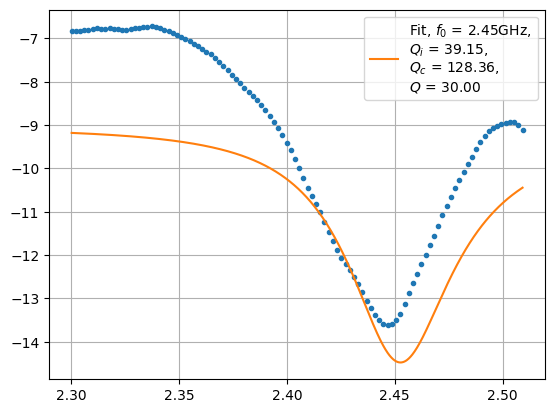

In [670]:
f, S21 = read_S21('3d_trap', fmin=2.3e9, fmax=2.51e9)
S21_dB = percent_to_dB(S21)
fit_param = f0, Q, Qc_mag, a, phi = get_S21_fit(f, S21, f0=2.45, Qc0=129, a0=0.2, t0=0., 
                                                          phi0=0.1, Q0=30, alpha0=0.02)
Qc = Qc_mag*np.exp(-1j*phi).real
plot(f/1e9, S21_dB, '.')
f_plot = np.linspace(min(f), max(f), 1000)
plot(f_plot/1e9, percent_to_dB(S21_mag(f_plot/1e9, *fit_param)), label=f'Fit, $f_0$ = {f0:.2f}GHz, \n$Q_i$ = {get_Qi(Q, Qc):.2f}, \n$Q_c$ = {Qc:.2f}, \n$Q$ = {Q:.2f}')
plt.legend()
plt.show()

In [681]:
f[np.argmin(S21_dB)]/1e9

2.446725318

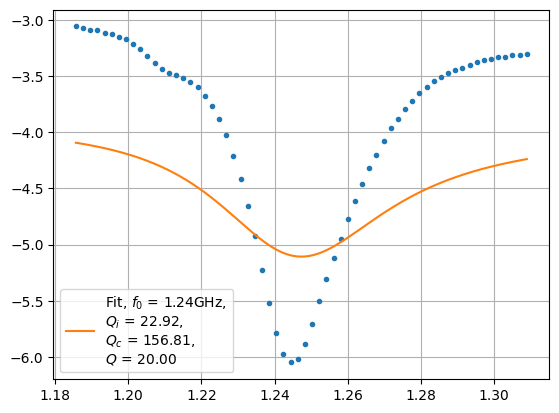

In [214]:
f, S21 = read_S21('3d_trap_vna2', fmin=1.185e9, fmax=1.31e9)
S21_dB = percent_to_dB(S21)
fit_param = f0, Q, Qc_mag, a, alpha, t, phi = get_S21_fit(f, S21_dB, f0=1.244, a0=0.53, Qc0=160, Q0=20, phi0=0.2, t0=0.4)
Qc = Qc_mag*np.exp(-1j*phi).real
plot(f/1e9, percent_to_dB(S21), '.')
f_plot = np.linspace(min(f), max(f), 1000)
plot(f_plot/1e9, percent_to_dB(S21_mag(f_plot/1e9, *fit_param)), label=f'Fit, $f_0$ = {f0:.2f}GHz, \n$Q_i$ = {get_Qi(Q, Qc):.2f}, \n$Q_c$ = {Qc:.2f}, \n$Q$ = {Q:.2f}')
plt.legend()
plt.show()

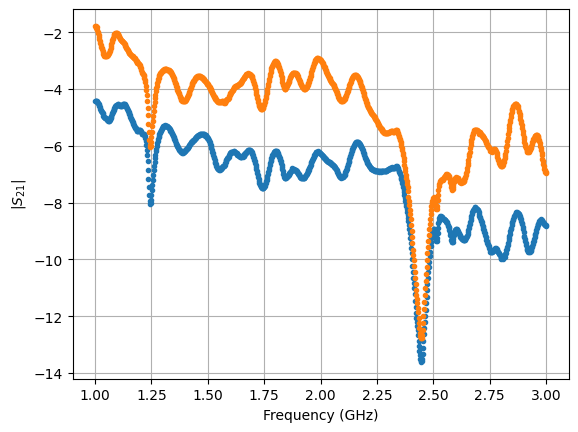

In [629]:
f, S21 = read_S21('3d_trap')#, fmin=1.19e9, fmax=1.31e9)
S21_dB = percent_to_dB(S21)
plot(f/1e9, S21_dB, '.', label='S21', xlabel='Frequency (GHz)')
f, S21 = read_S21('3d_trap_vna2')#, fmin=1.19e9, fmax=1.31e9)
S21_dB = percent_to_dB(S21)
plot(f/1e9, S21_dB, '.', label='S21', xlabel='Frequency (GHz)', ylabel=r'$|S_{21}|$')

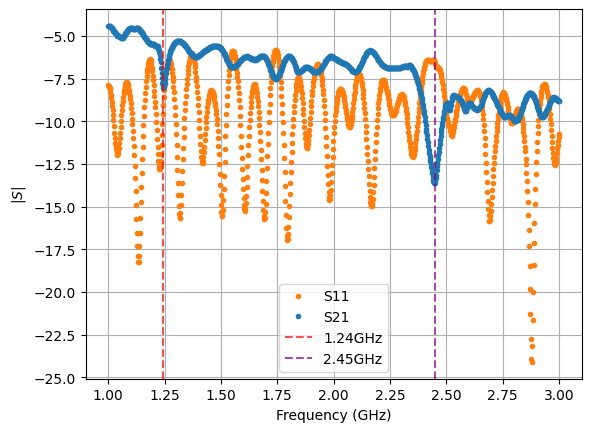

In [651]:
f, S21 = read_S21('3d_trap')#, fmin=1.19e9, fmax=1.31e9)
S21_dB = percent_to_dB(S21)

f, S11 = read_S11('3d_trap')#, fmin=1.19e9, fmax=1.31e9)
S11_dB = percent_to_dB(S11)
plot(f/1e9, S11_dB, '.', color='C1', label='S11', xlabel='Frequency (GHz)')
plot(f/1e9, S21_dB, '.', color='C0', label='S21', xlabel='Frequency (GHz)', ylabel=r'$|S|$')
plt.axvline(1.244, color='r', linestyle='--', alpha=0.7, label='1.24GHz')
plt.axvline(2.45, color='purple', linestyle='--', alpha=0.7, label='2.45GHz')
plt.legend() 
plt.show()

In [4]:
f, S21 = read_S21('3layer_gen2', fmin=2.3e9, fmax=2.51e9)
S21_dB = percent_to_dB(S21)
fit_param = f0, Q, Qc_mag, a, phi = get_S21_fit(f, S21, f0=2.45, Qc0=129, a0=0.2, t0=0., 
                                                          phi0=0.1, Q0=30, alpha0=0.02)
Qc = Qc_mag*np.exp(-1j*phi).real
plot(f/1e9, S21_dB, '.')
f_plot = np.linspace(min(f), max(f), 1000)
plot(f_plot/1e9, percent_to_dB(S21_mag(f_plot/1e9, *fit_param)), label=f'Fit, $f_0$ = {f0:.2f}GHz, \n$Q_i$ = {get_Qi(Q, Qc):.2f}, \n$Q_c$ = {Qc:.2f}, \n$Q$ = {Q:.2f}')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\electron\\Downloads/3layer_gen2.s2p'

In [7]:
pd.read_csv(f'{base}/3layer_gen2.csv', delimiter=';')

,1200000000,-1.267183423e-01,1.074329615e-01,4.157188535e-01,-6.210209727e-01,0.000000000e+00,0.000000000e+00.1,0.000000000e+00.2,0.000000000e+00.3
0,1201250000,-0.113364,0.119137,0.368521,-0.648842,0.0,0.0,0.0,0.0
1,1202500000,-0.099771,0.130043,0.319526,-0.673489,0.0,0.0,0.0,0.0
2,1203750000,-0.085256,0.139919,0.269157,-0.694933,0.0,0.0,0.0,0.0
3,1205000000,-0.070270,0.148783,0.217217,-0.711947,0.0,0.0,0.0,0.0
4,1206250000,-0.054684,0.156390,0.164879,-0.724695,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
395,1695000000,0.437334,0.115139,-0.166011,0.564574,0.0,0.0,0.0,0.0
396,1696250000,0.446513,0.088786,-0.126644,0.573679,0.0,0.0,0.0,0.0
397,1697500000,0.453473,0.060025,-0.084447,0.579156,0.0,0.0,0.0,0.0
398,1698750000,0.458346,0.032156,-0.044522,0.584217,0.0,0.0,0.0,0.0
